In [1]:
import pandas as pd 
import geopandas as gpd 
import warnings 
import os 
import sys
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Get Parent folder : 
current_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_path, '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from build_inputs.build_netmob_data import load_netmob_gdf

FOLDER_PATH = '../../../../data/rrochas/prediction_validation' 
save_path = f"{FOLDER_PATH}/POIs"
PATH_iris = f'{FOLDER_PATH}/lyon_iris_shapefile'
# Load NetMob gdf
Netmob_gdf,working_zones = load_netmob_gdf(FOLDER_PATH = FOLDER_PATH,
                            data_folder = PATH_iris, 
                            geojson_path = 'NetMob_lyon.geojson',
                            zones_path = 'lyon.shp')
Netmob_gdf_dropped = Netmob_gdf.drop_duplicates(subset = ['tile_id'])  # Some Doubles are exis


## Load POIs Stadium and their location : 

In [3]:
save_path = f"{FOLDER_PATH}/POIs"
POIs = gpd.read_file(f"{save_path}/gdf_stadium.geojson")

In [12]:
Lou_rugby = POIs[POIs.nom == 'Matmut Stadium Gerland']
Astroballe = POIs[POIs.nom == 'Astroballe']
Groupama = POIs[POIs.nom == 'Groupama Stadium']

tile_ids_Lou_rugby = Netmob_gdf_dropped.sjoin(Lou_rugby)
tile_ids_Astroballe = Netmob_gdf_dropped.sjoin(Astroballe)
tile_ids_Groupama = Netmob_gdf_dropped.sjoin(Groupama)

stadium2tile_ids = {'Lou_rugby':list(tile_ids_Lou_rugby.tile_id),
                    'Astroballe':list(tile_ids_Astroballe.tile_id),
                    'Groupama':list(tile_ids_Groupama.tile_id)
                    }

## Load Time-Serie on these specific location :

Tackle Apple_Video DL at Lou_rugby


<Axes: >

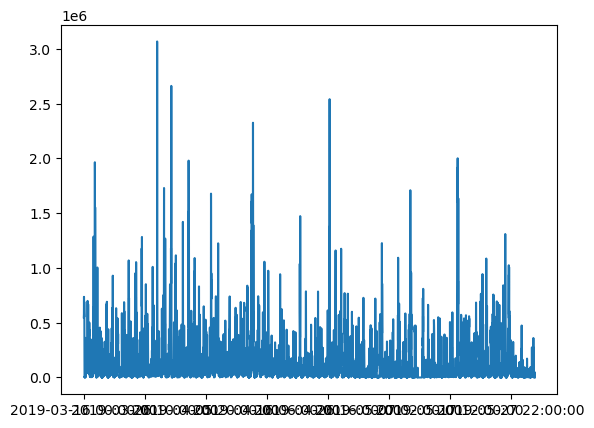

In [62]:
FOLDER_PATH = '../../../../data/rrochas/prediction_validation' 
app : 'Instagram'
transfer_mode = 'DL'
stadium = 'Lou_rugby'
folder_path_app = f"{FOLDER_PATH}/POIs/stadium/{app}"

print(f"Tackle {app} {transfer_mode} at {stadium}")
serie = pd.read_csv(f"{folder_path_app}/df_{stadium}_{transfer_mode}.csv",index_col = 0)
serie = serie.sum(axis=1)